In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("/kaggle/input/pima-indians-diabetes-dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,169.5,33.6,0.627,50,1
1,1,85,66.0,29,102.5,26.6,0.351,31,0
2,8,183,64.0,32,169.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


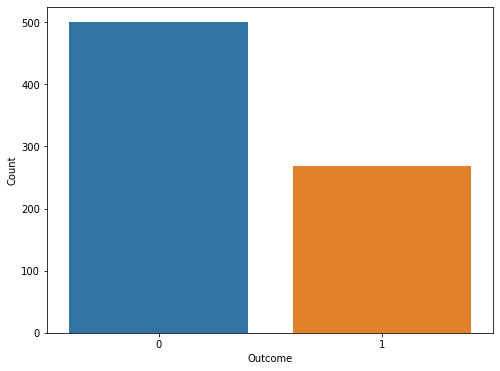

In [10]:
value_counts = df.Outcome.value_counts()

# Create a count plot using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df, order=value_counts.index)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


<AxesSubplot:ylabel='Outcome'>

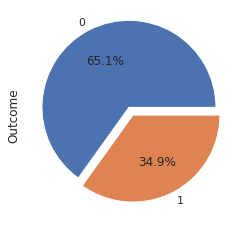

In [51]:
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0])

<AxesSubplot:>

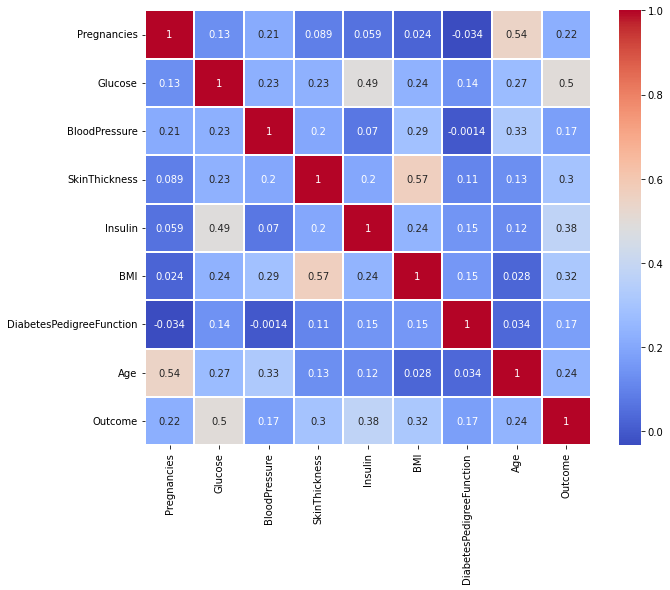

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.1)

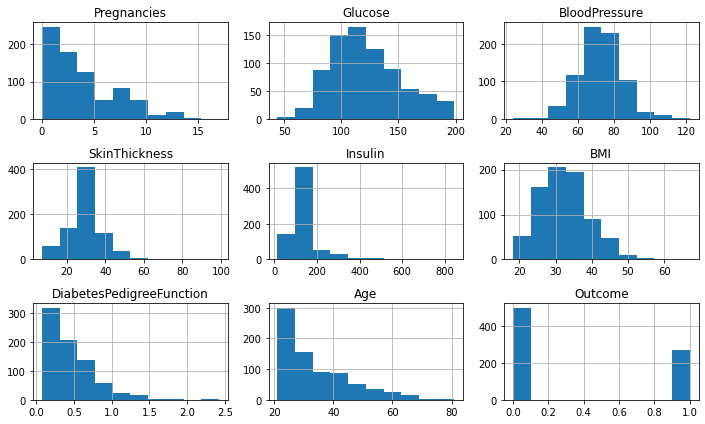

In [16]:
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

In [21]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

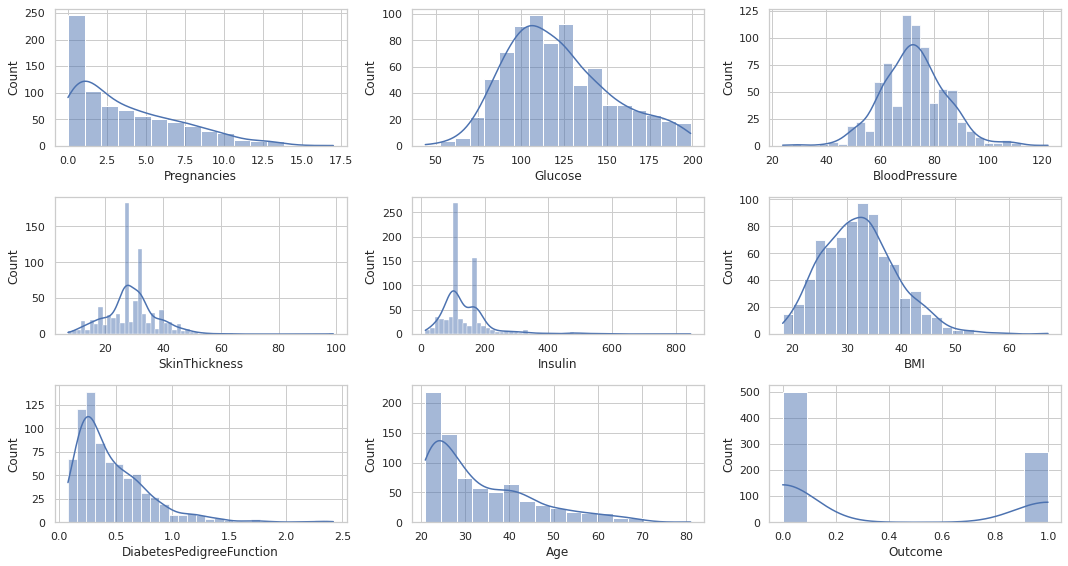

In [26]:
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")  # Optional: Set the style of the plots

# Loop through each column and create distribution plots
for column in df.columns:
    plt.subplot(3, 3, df.columns.get_loc(column) + 1)  # Adjust subplot layout as needed
    sns.histplot(data=df, x=column, kde=True)

plt.tight_layout()
plt.show()

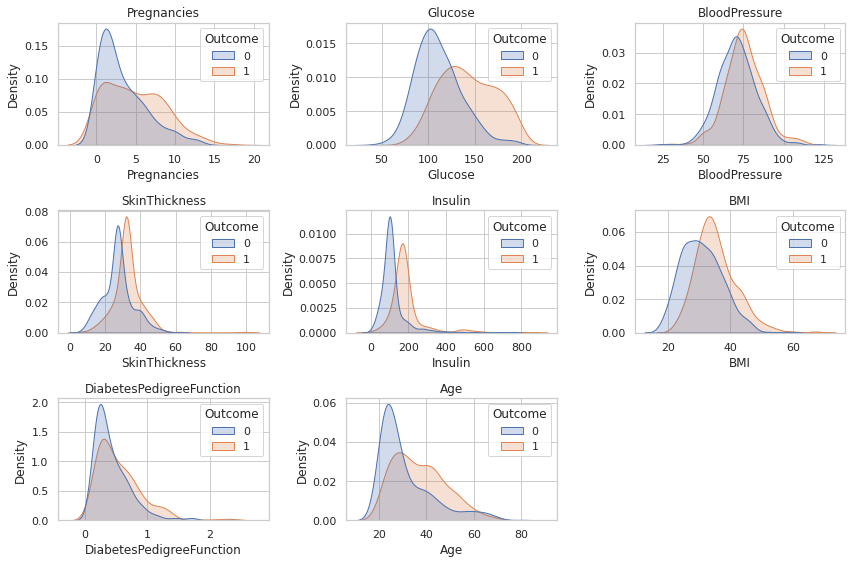

In [53]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

for column in df.columns[:-1]:  # Exclude the Outcome column
    plt.subplot(3, 3, df.columns.get_loc(column) + 1)  # Adjust subplot layout as needed
    sns.kdeplot(data=df, x=column, hue="Outcome",fill=True,common_norm=False)
    plt.title(column)

plt.tight_layout()
plt.show()

<Figure size 1440x1080 with 0 Axes>

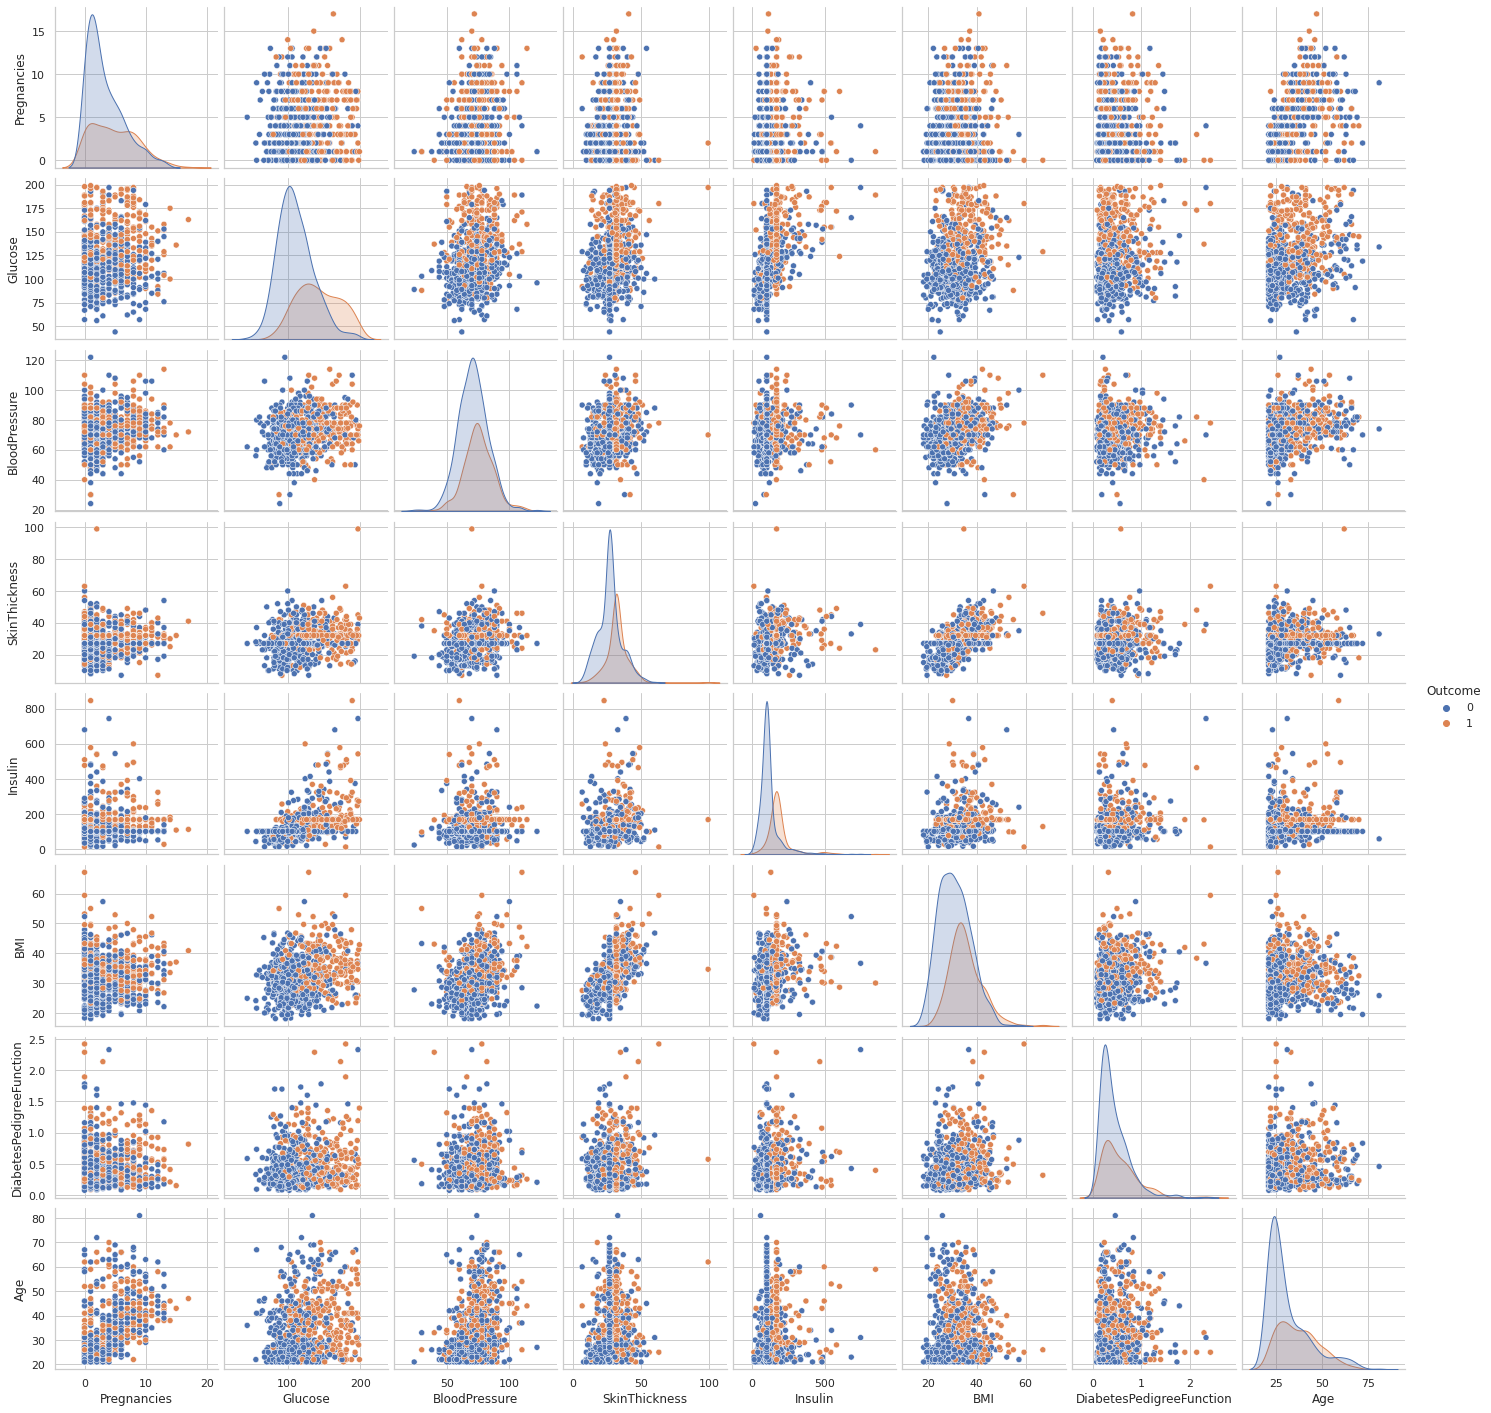

In [55]:
plt.figure(figsize=(20,15))
sns.set(style="whitegrid")
sns.pairplot(df, hue="Outcome", diag_kind="kde")

plt.show()

<h3>Train test split</h3>

In [29]:
X = df.drop("Outcome",axis="columns")
y = df.Outcome

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

array([[ 0.63994726,  0.86462486, -0.03218035,  0.66518138,  0.31160394,
         0.16948251,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.20472661, -0.52812374, -0.01011181, -0.44084303,
        -0.84854874, -0.36506078, -0.19067191],
       [ 1.23388019,  2.01426457, -0.69343821,  0.32753478,  0.31160394,
        -1.32847775,  0.60439732, -0.10558415]])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2, random_state=10)

In [32]:
X_train.shape

(614, 8)

In [33]:
X_test.shape

(154, 8)

In [34]:
y_train.value_counts()

0    405
1    209
Name: Outcome, dtype: int64

In [ ]:
y_test.value_counts()

<h3>Train using Random Forest</h3>

In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [43]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [45]:
y_pred = rfc.predict(X_test)

<AxesSubplot:>

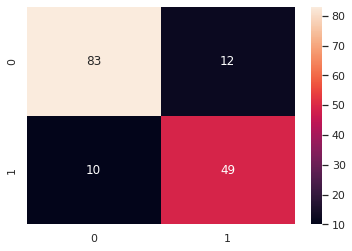

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)

In [47]:
from sklearn.metrics import classification_report, accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        95
           1       0.80      0.83      0.82        59

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



# Initialize classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Support Vector Machine", SVC()),
    ("Naive Bayes",GaussianNB())
]

# Initialize a dataframe to store results
results_df = pd.DataFrame(columns=['Algorithm', 'Accuracy'])

# Iterate through classifiers, train, predict and store accuracy
for algorithm, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_df = results_df.append({'Algorithm': algorithm, 'Accuracy': accuracy}, ignore_index=True)

# Print the results dataframe
print(results_df)


                Algorithm  Accuracy
0     Logistic Regression  0.733766
1  Support Vector Machine  0.824675
2             Naive Bayes  0.766234
